In [1]:
! pip install numpy matplotlib

Random Seed: 42

Generated Network:
- Input Features: 5 -> Values: [np.float64(4.6), np.float64(2.0), np.float64(-6.9), np.float64(-6.9), np.float64(-8.8)]
- Hidden Layers: 1
  • Layer 1: 4 neurons
- Output Layer: 2 neuron

Weights and Biases:
Layer 1:
Weights:
[[ 0.73235229  0.20223002  0.41614516 -0.95883101  0.9398197 ]
 [ 0.66488528 -0.57532178 -0.63635007 -0.63319098 -0.39151551]
 [ 0.04951286 -0.13610996 -0.41754172  0.22370579 -0.72101228]
 [-0.4157107  -0.26727631 -0.08786003  0.57035192 -0.60065244]]
Biases:
[ 0.02846888  0.18482914 -0.90709917  0.2150897 ]

Layer 2:
Weights:
[[-0.65895175 -0.86989681  0.89777107  0.93126407]
 [ 0.6167947  -0.39077246 -0.80465577  0.36846605]]
Biases:
[-0.11969501 -0.75592353]

Final Outputs:
- Sigmoid: [0.526]
- Tanh: [0.095]
- ReLU: [0.000]
- Leaky ReLU: [-0.065]


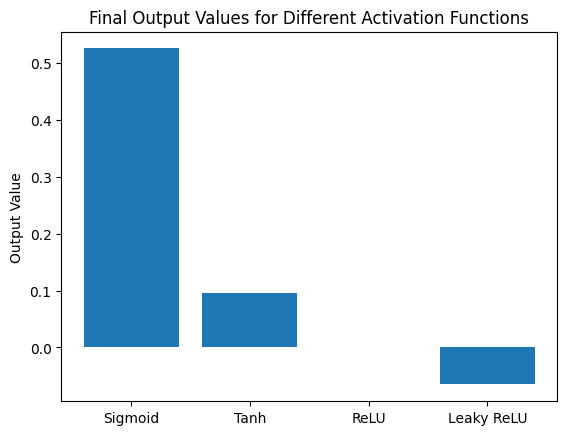


Output Plot Displayed


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x):
    return np.where(x > 0, x, 0.01 * x)

# Forward propagation function
def forward_pass(input_vec, weights_list, biases_list, activation):
    a = input_vec
    for w, b in zip(weights_list, biases_list):
        z = np.dot(w, a) + b
        a = activation(z)
    return a

# Set seed for reproducibility
np.random.seed(42)

# Generate random network structure
n = np.random.randint(3, 7)  # Input features [3,6]
L = np.random.randint(1, 4)  # Hidden layers [1,3]
hidden_neurons = [np.random.randint(2, 6) for _ in range(L)]  # Neurons per hidden layer [2,5]

# Output layer has 1 neuron
output_neurons = 2

# Layer sizes
layer_sizes = [n] + hidden_neurons + [output_neurons]

# Generate random input
input_vec = np.random.uniform(-10, 10, n)

# Generate weights and biases
weights_list = []
biases_list = []
for i in range(len(layer_sizes) - 1):
    weights = np.random.uniform(-1, 1, (layer_sizes[i+1], layer_sizes[i]))
    biases = np.random.uniform(-1, 1, layer_sizes[i+1])
    weights_list.append(weights)
    biases_list.append(biases)

# Print network structure
print("Random Seed: 42")
print("\nGenerated Network:")
print(f"- Input Features: {n} -> Values: {list(np.round(input_vec, 1))}")
print(f"- Hidden Layers: {L}")
for i, neurons in enumerate(hidden_neurons, 1):
    print(f"  • Layer {i}: {neurons} neurons")
print(f"- Output Layer: {output_neurons} neuron")

# Print weights and biases
print("\nWeights and Biases:")
for i in range(len(weights_list)):
    print(f"Layer {i+1}:")
    print("Weights:")
    print(weights_list[i])
    print("Biases:")
    print(biases_list[i])
    print()

# Activation functions dictionary
activations = {
    'Sigmoid': sigmoid,
    'Tanh': tanh,
    'ReLU': relu,
    'Leaky ReLU': leaky_relu
}

# Compute final outputs
final_outputs = {}
for name, act in activations.items():
    output = forward_pass(input_vec, weights_list, biases_list, act)
    final_outputs[name] = output[0]  # Since output is array of size 1

# Print final outputs
print("Final Outputs:")
for name, value in final_outputs.items():
    print(f"- {name}: [{value:.3f}]")

# Plot the final outputs
plt.bar(final_outputs.keys(), final_outputs.values())
plt.title("Final Output Values for Different Activation Functions")
plt.ylabel("Output Value")
plt.show()

print("\nOutput Plot Displayed")